In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
Data1 = pd.read_csv("Covid_19.csv")
print(Data1)

         Countries Positive_Cases Negative_Cases      Survive      Death  \
0    United States   10,00,00,000   50,00,00,000  9,00,00,000  10,00,000   
1            India    4,50,00,000   30,00,00,000  4,30,00,000   5,30,000   
2           Brazil    3,60,00,000   12,00,00,000  3,40,00,000   7,00,000   
3          Germany    1,00,00,000    5,00,00,000    95,00,000   1,20,000   
4        Australia    1,20,00,000    4,00,00,000  1,19,00,000     20,000   
..             ...            ...            ...          ...        ...   
99         Nirvana            550          9,800           14        530   
100        Elysium            300          5,500            6        290   
101       Valhalla          1,200         15,500           35      1,150   
102     Shangri-La            800         10,800           19        780   
103         Avalon            400          7,200            9        390   

    Vaccination_Date  
0         14-12-2020  
1         16-01-2021  
2         17-01-20

In [3]:
print(Data1.head(10))
print(Data1.isnull())

        Countries Positive_Cases Negative_Cases      Survive      Death  \
0   United States   10,00,00,000   50,00,00,000  9,00,00,000  10,00,000   
1           India    4,50,00,000   30,00,00,000  4,30,00,000   5,30,000   
2          Brazil    3,60,00,000   12,00,00,000  3,40,00,000   7,00,000   
3         Germany    1,00,00,000    5,00,00,000    95,00,000   1,20,000   
4       Australia    1,20,00,000    4,00,00,000  1,19,00,000     20,000   
5  United Kingdom    2,00,00,000    7,00,00,000  1,90,00,000   1,50,000   
6          Canada      70,00,000    3,50,00,000    68,00,000     45,000   
7    South Africa      40,00,000    1,50,00,000  3,80,00,000   1,00,000   
8          Russia    2,50,00,000   10,00,00,000  2,40,00,000   5,00,000   
9           China      50,00,000    2,00,00,000  4,80,00,000     10,000   

  Vaccination_Date  
0       14-12-2020  
1       16-01-2021  
2       17-01-2021  
3       27-12-2020  
4       22-02-2021  
5       08-12-2020  
6       14-12-2020  
7     

In [4]:
print("# of Company's in original data:"+str(len(Data1)))

# of Company's in original data:104


# DATA ANALYSIS

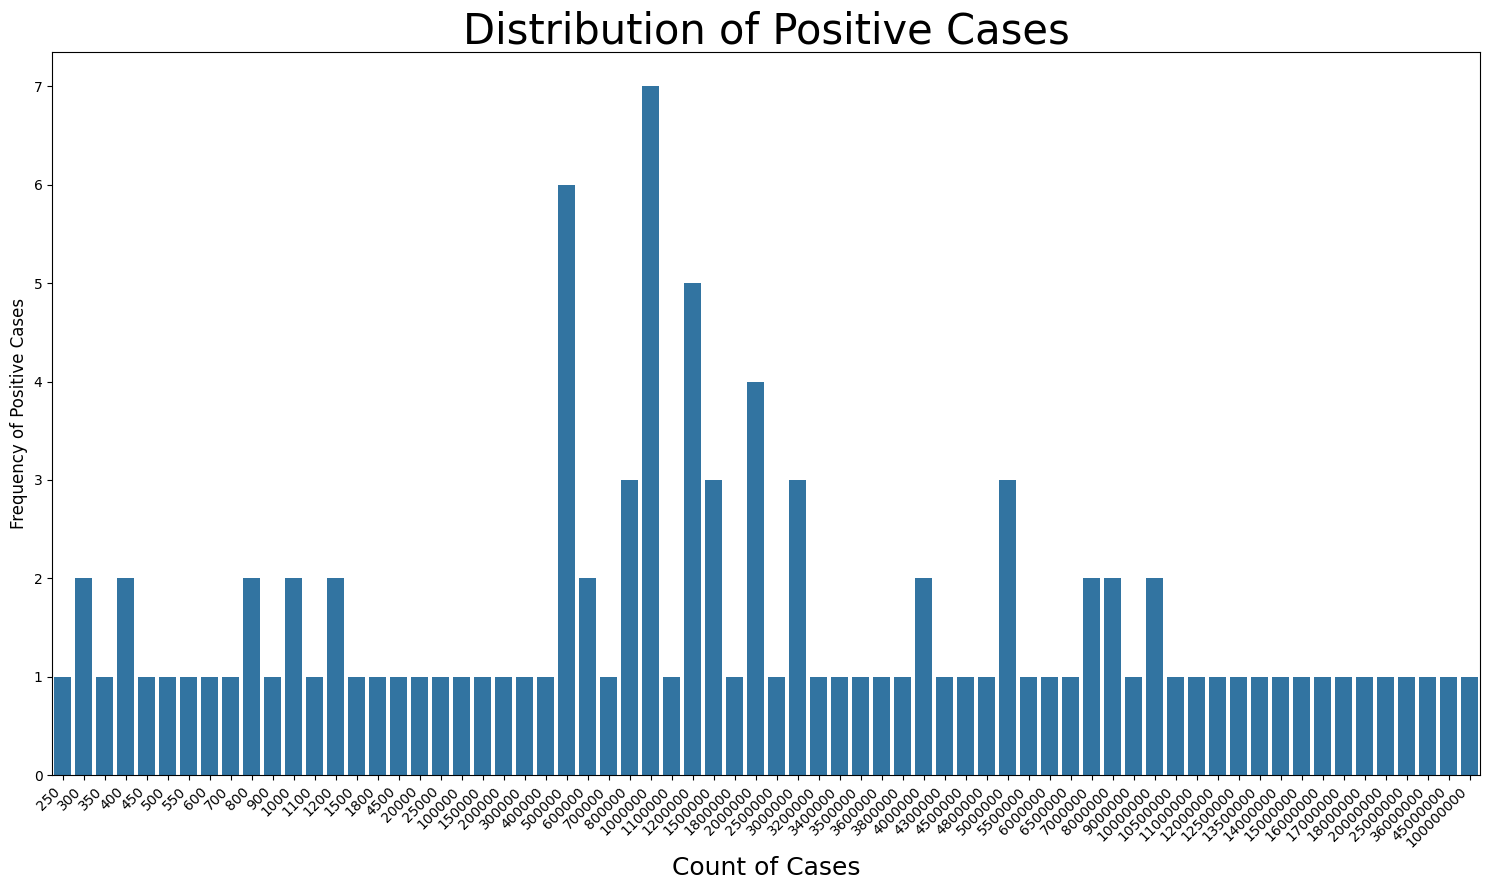

In [43]:
plt.figure(figsize=(15, 9))
sns.countplot(x="Positive_Cases", data=Data1)
plt.title("Distribution of Positive Cases", fontsize=30)
plt.xlabel("Count of Cases", fontsize=18)
plt.ylabel("Frequency of Positive Cases", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

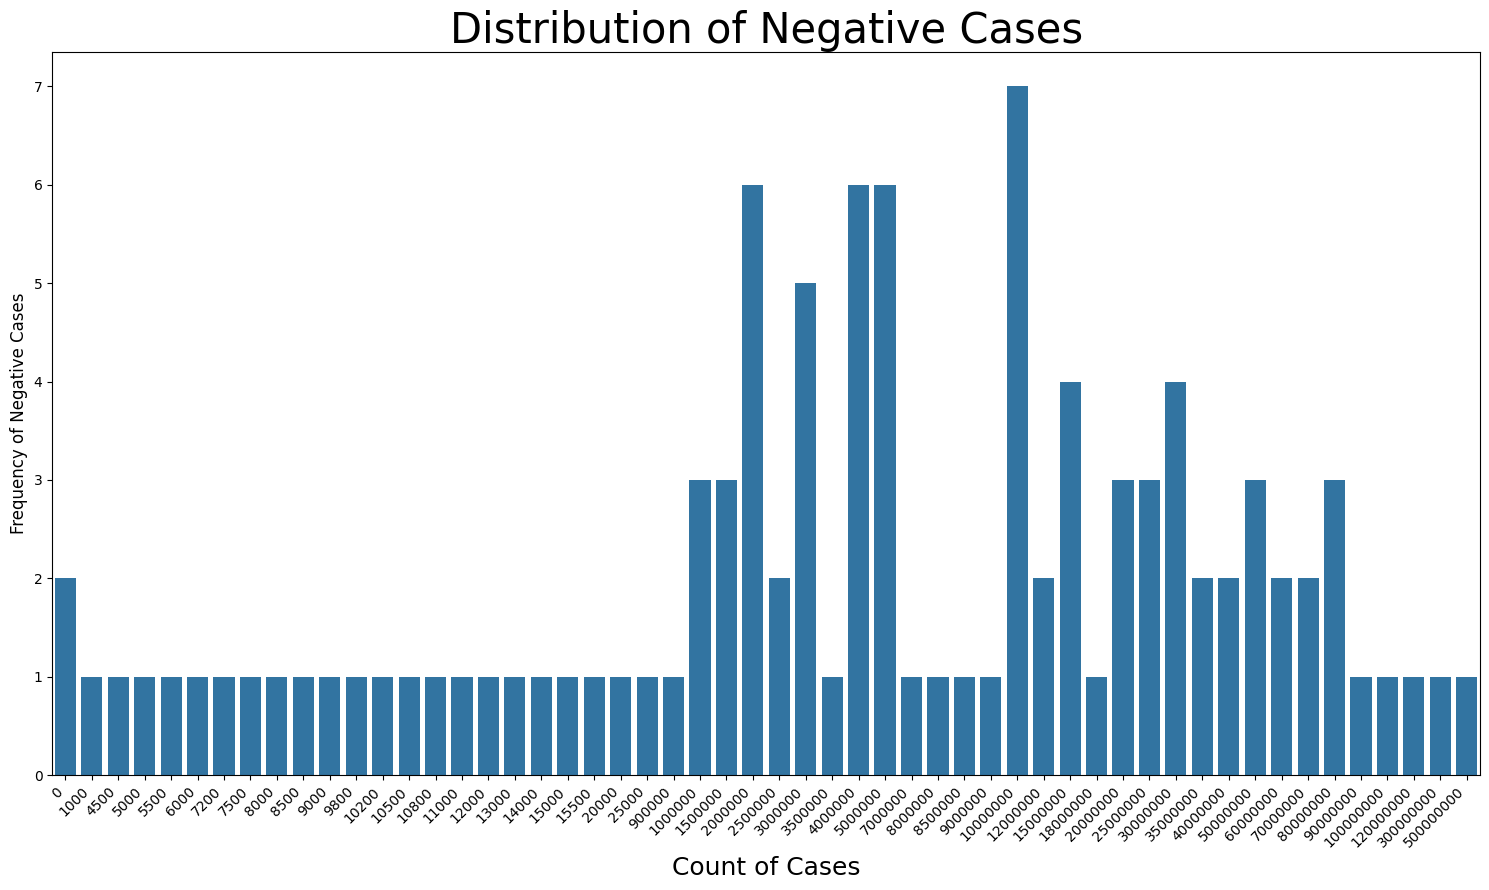

In [44]:
plt.figure(figsize=(15, 9))
sns.countplot(x="Negative_Cases", data=Data1)
plt.title("Distribution of Negative Cases", fontsize=30)
plt.xlabel("Count of Cases", fontsize=18)
plt.ylabel("Frequency of Negative Cases", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

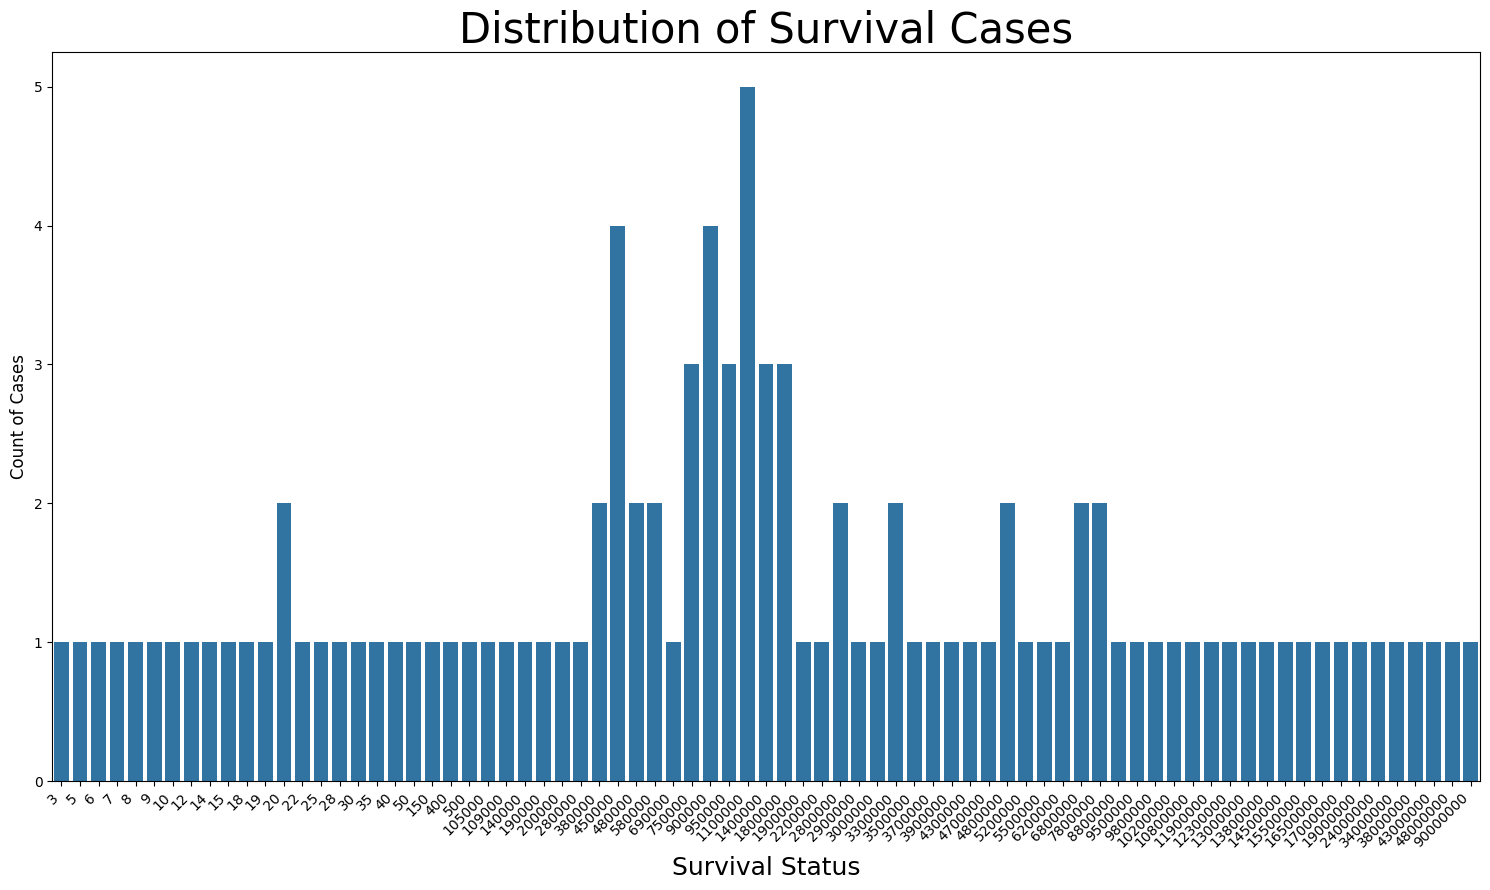

In [45]:
plt.figure(figsize=(15, 9))
sns.countplot(x="Survive", data=Data1)
plt.title("Distribution of Survival Cases", fontsize=30)
plt.xlabel("Survival Status", fontsize=18)
plt.ylabel("Count of Cases", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

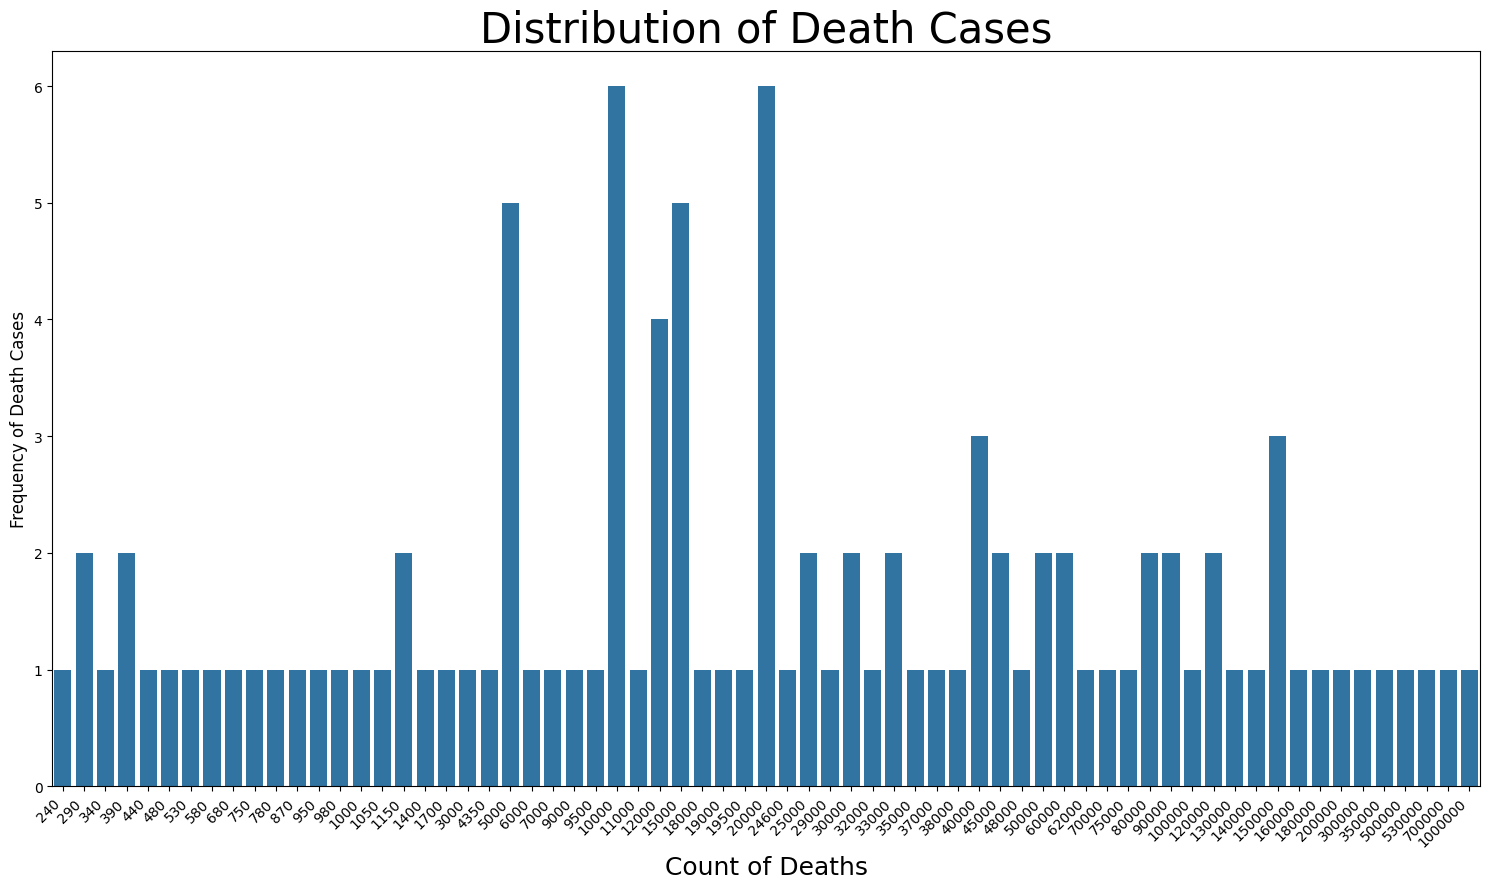

In [46]:
plt.figure(figsize=(15, 9))

# Step 2: Create a count plot for the 'Death' column
sns.countplot(x="Death", data=Data1)

# Step 3: Set the title and labels for the plot
plt.title("Distribution of Death Cases", fontsize=30)
plt.xlabel("Count of Deaths", fontsize=18)
plt.ylabel("Frequency of Death Cases", fontsize=12)

# Step 4: Rotate x-tick labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

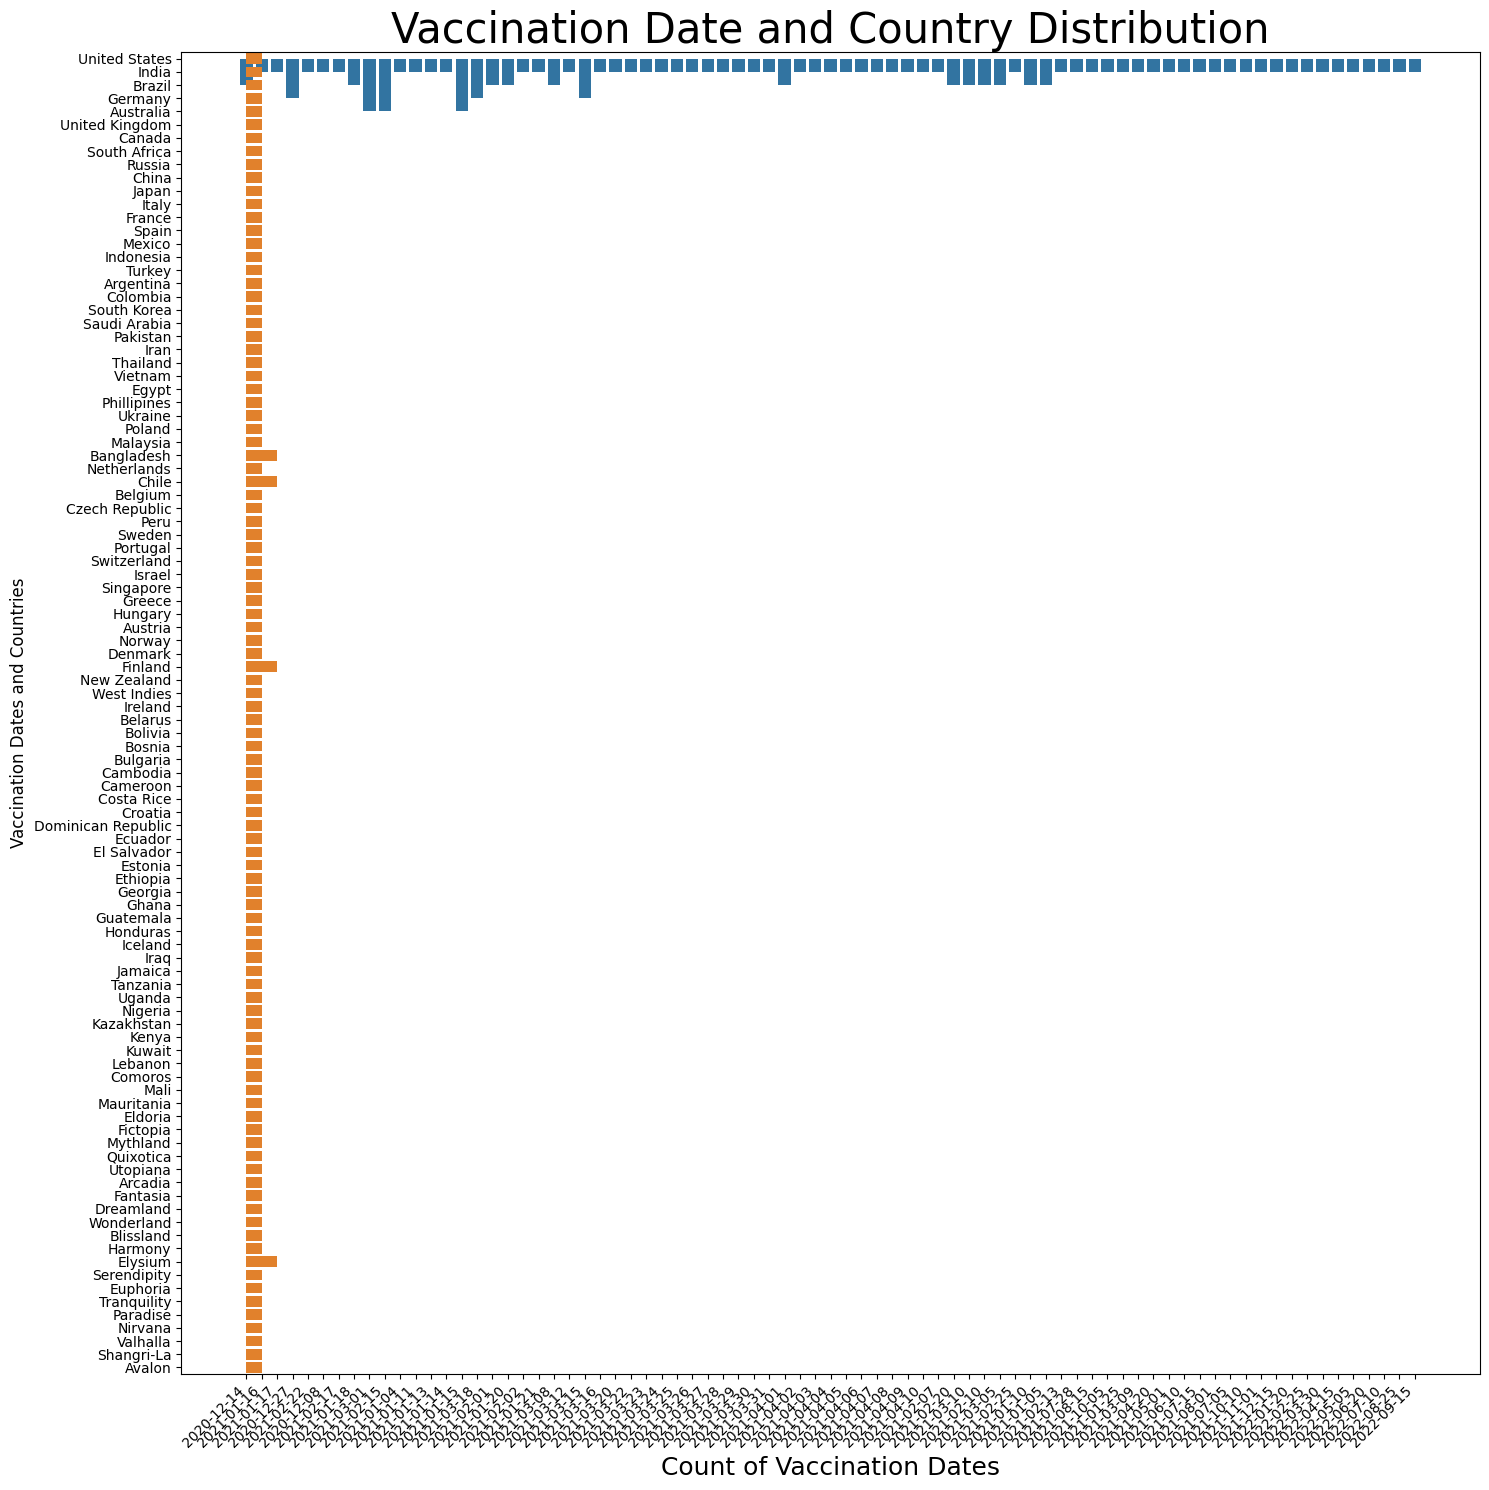

In [47]:
plt.figure(figsize=(15, 15))

# Step 2: Create a count plot for 'Vaccination_Date'
sns.countplot(x="Vaccination_Date", data=Data1)

# Step 3: Create a horizontal count plot for 'Countries'
sns.countplot(y="Countries", data=Data1)

# Step 4: Set the title and labels for the plot
plt.title("Vaccination Date and Country Distribution", fontsize=30)
plt.xlabel("Count of Vaccination Dates", fontsize=18)
plt.ylabel("Vaccination Dates and Countries", fontsize=12)

# Step 5: Rotate x-tick labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=10)

# Step 6: Adjust layout to prevent clipping of tick-labels
plt.tight_layout()

# Step 7: Display the plot
plt.show()

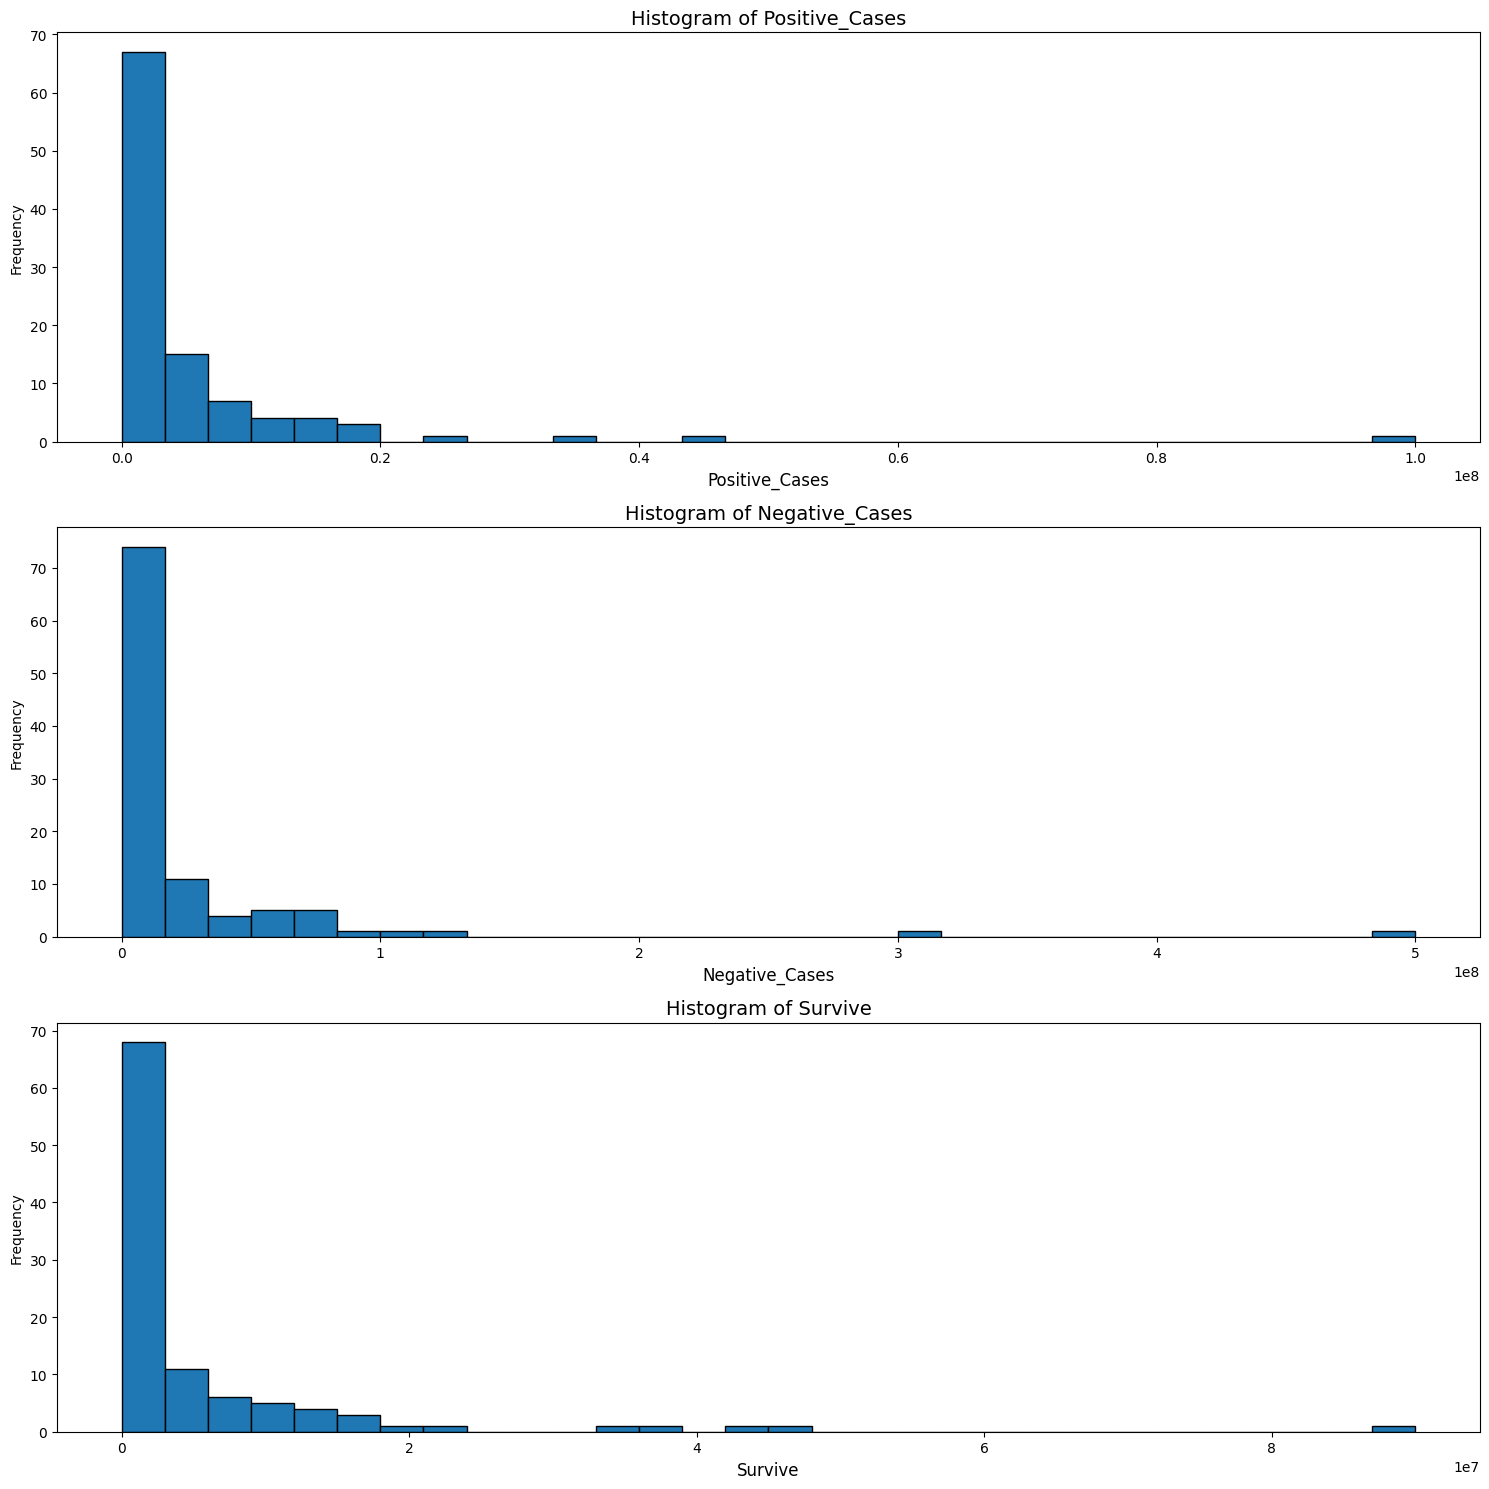

In [48]:
numeric_columns = ['Positive_Cases', 'Negative_Cases', 'Survive']
for col in numeric_columns:
    Data1[col] = pd.to_numeric(Data1[col], errors='coerce')

# Step 2: Drop rows with NaN values in the specified numeric columns
Data1 = Data1.dropna(subset=numeric_columns)

# Step 3: Determine the number of numeric columns for plotting
num_columns = len(numeric_columns)

# Step 4: Set the figure size for the histograms
plt.figure(figsize=(15, 5 * num_columns))

# Step 5: Create histograms for each numeric column
for index, col in enumerate(numeric_columns):
    plt.subplot(num_columns, 1, index + 1)
    Data1[col].plot.hist(bins=30, edgecolor='black')
    plt.xlabel(col, fontsize=12)
    plt.title(f"Histogram of {col}", fontsize=14)

# Step 6: Adjust layout to prevent overlap
plt.tight_layout()

# Step 7: Display the histograms
plt.show()

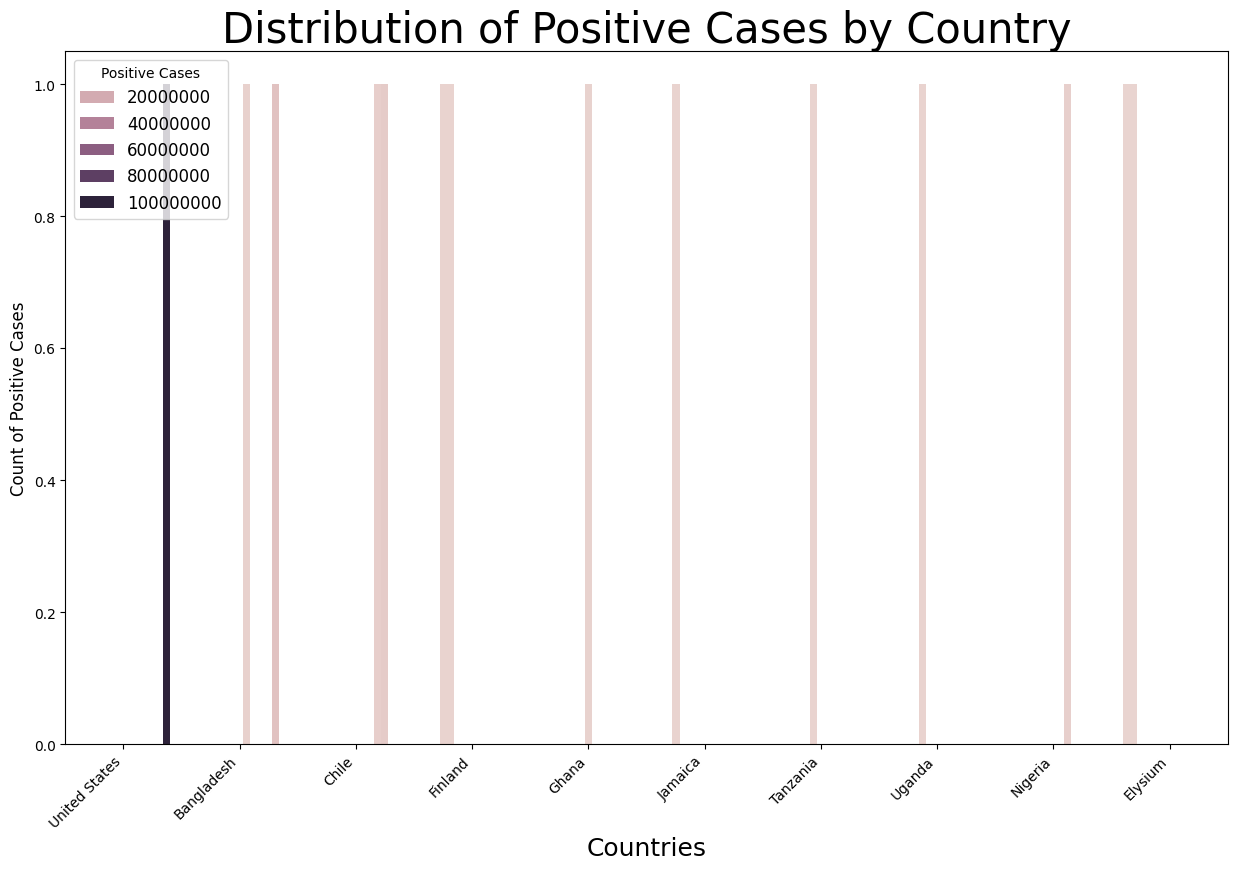

In [49]:
top_countries_list = Data1['Countries'].value_counts().nlargest(10).index
filtered_data = Data1[Data1['Countries'].isin(top_countries_list)]
plt.figure(figsize=(15, 9))
sns.countplot(x="Countries", hue="Positive_Cases", data=filtered_data)
plt.title("Distribution of Positive Cases by Country", fontsize=30)
plt.xlabel("Countries", fontsize=18)
plt.ylabel("Count of Positive Cases", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(title='Positive Cases', fontsize=12)
plt.show()

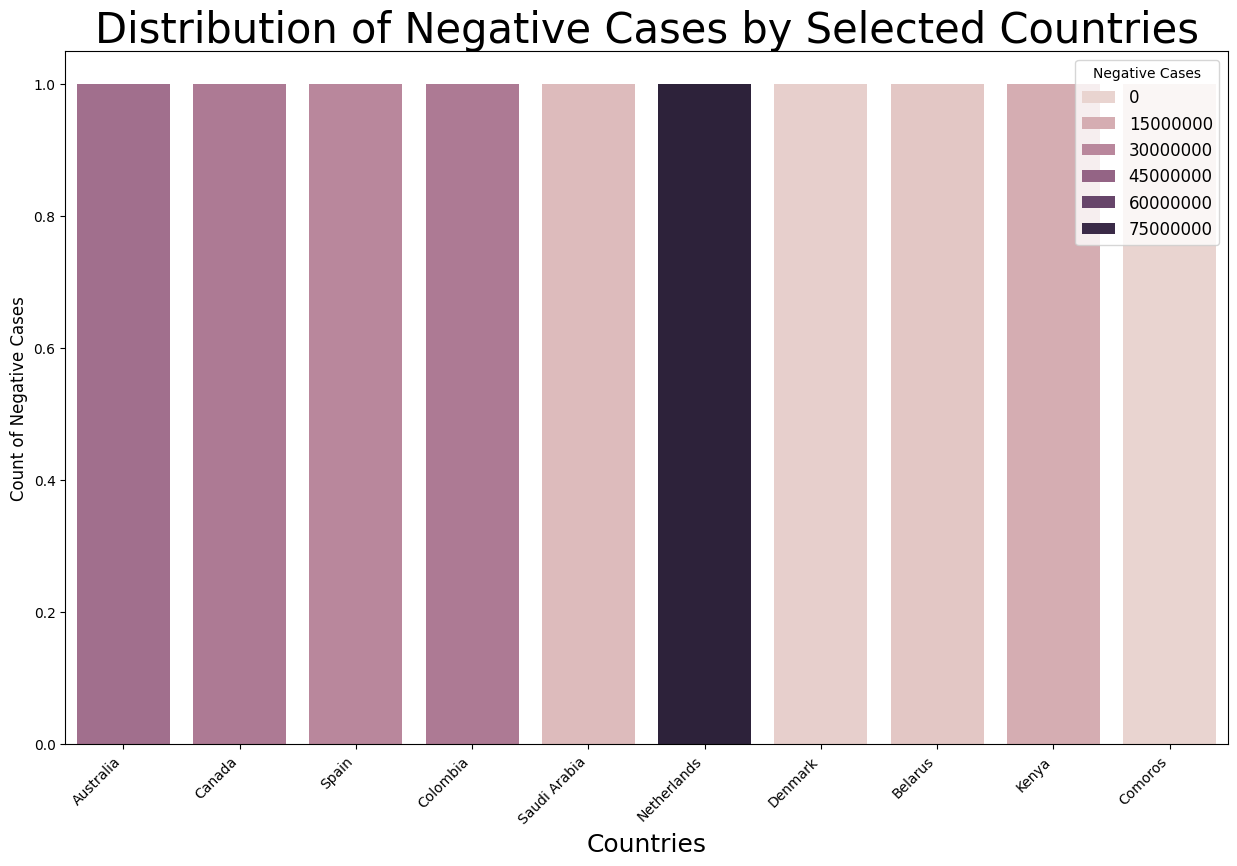

In [50]:
unique_countries = Data1['Countries'].unique()
number_of_countries = 10
randomly_selected_countries = np.random.choice(unique_countries, size=number_of_countries, replace=False)
filtered_data = Data1[Data1['Countries'].isin(randomly_selected_countries)]
plt.figure(figsize=(15, 9))
sns.countplot(x="Countries", hue="Negative_Cases", data=filtered_data)
plt.title("Distribution of Negative Cases by Selected Countries", fontsize=30)
plt.xlabel("Countries", fontsize=18)
plt.ylabel("Count of Negative Cases", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(title='Negative Cases', fontsize=12)
plt.show()

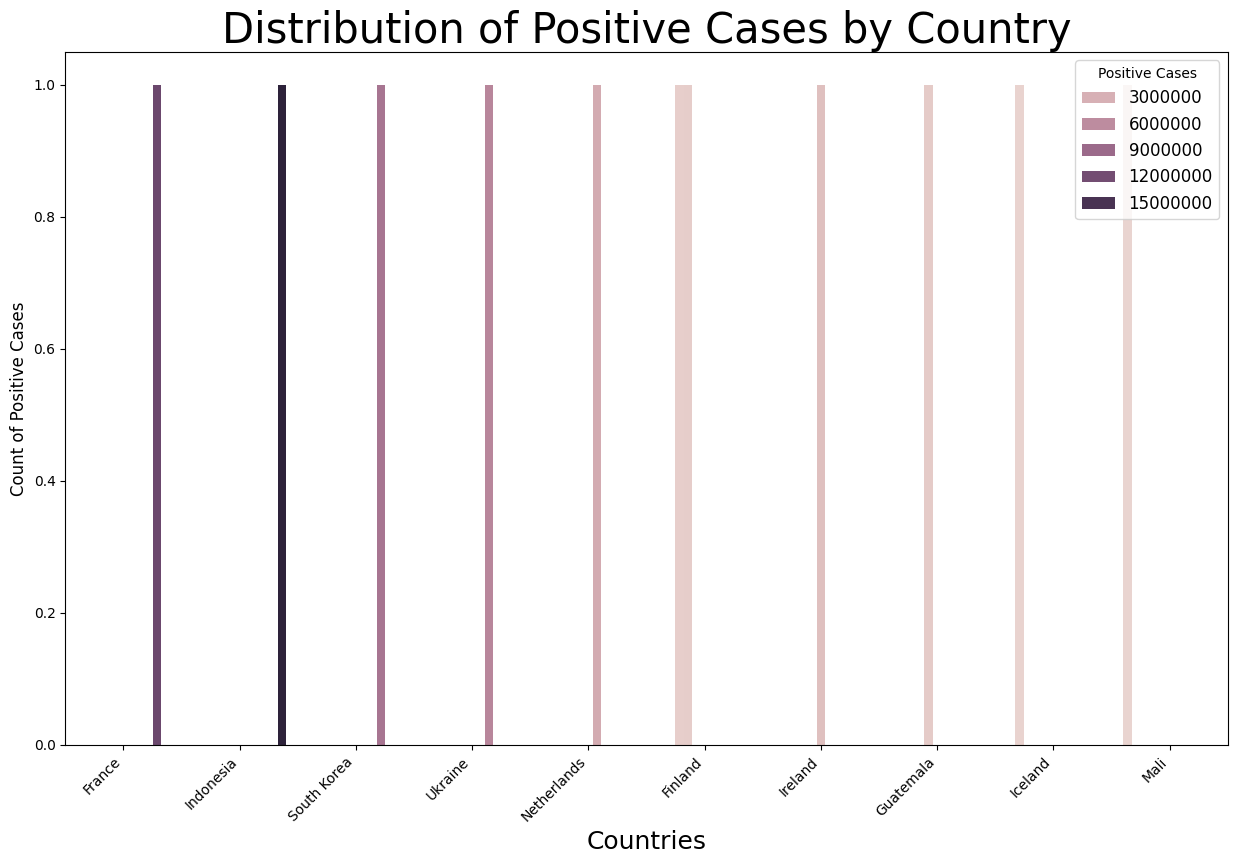

In [51]:
unique_countries_list = Data1['Countries'].unique()
number_of_countries_to_select = 10
randomly_chosen_countries = np.random.choice(unique_countries_list, size=number_of_countries_to_select, replace=False)
filtered_data = Data1[Data1['Countries'].isin(randomly_chosen_countries)]
plt.figure(figsize=(15, 9))
sns.countplot(x="Countries", hue="Positive_Cases", data=filtered_data)
plt.title("Distribution of Positive Cases by Country", fontsize=30)
plt.xlabel("Countries", fontsize=18)
plt.ylabel("Count of Positive Cases", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(title='Positive Cases', fontsize=12)
plt.show()

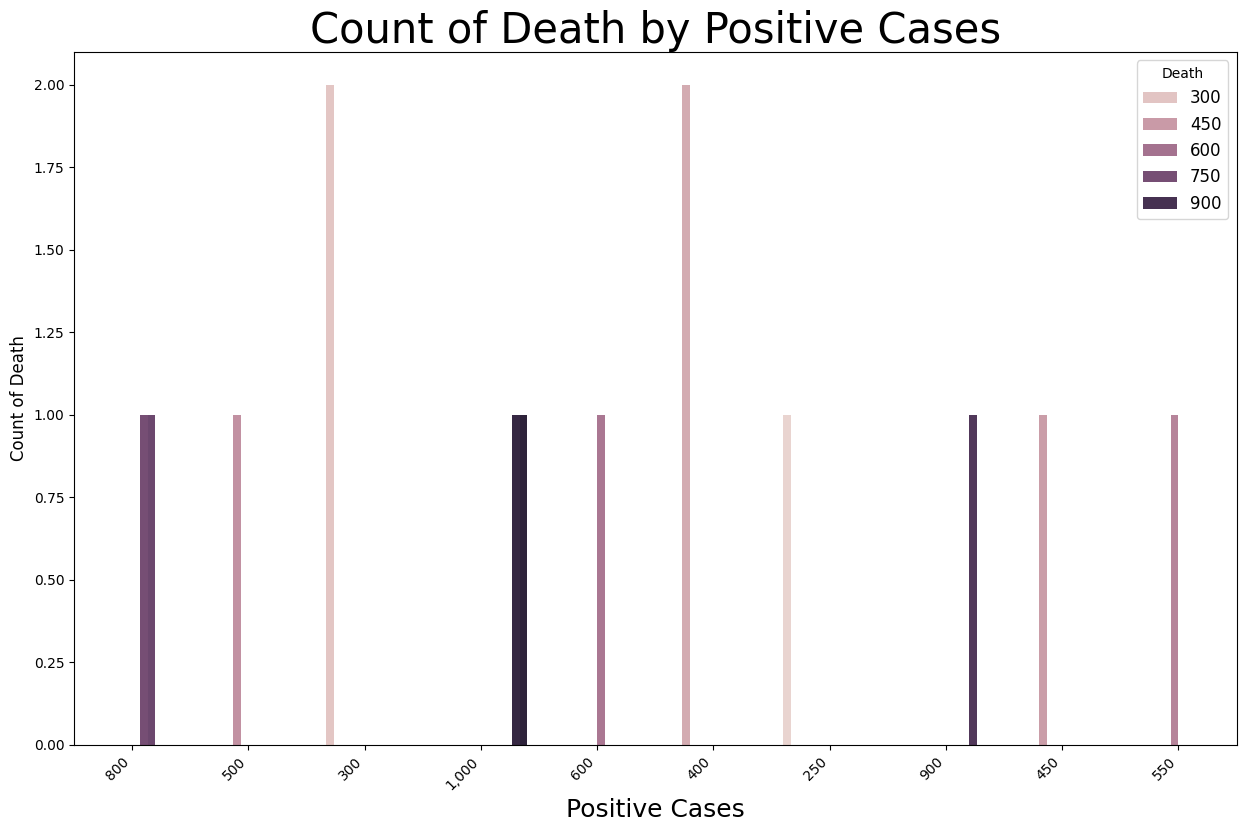

In [77]:
all_positive_cases = Data1['Positive_Cases'].unique()
num_positive_cases_to_select = 10
selected_positive_cases = np.random.choice(all_positive_cases, size=num_positive_cases_to_select, replace=False)
filtered_data = Data1[Data1['Positive_Cases'].isin(selected_positive_cases)]
plt.figure(figsize=(15, 9))
sns.countplot(x="Positive_Cases", hue="Death", data=filtered_data)
plt.title("Count of Death by Positive Cases", fontsize=30)
plt.xlabel("Positive Cases", fontsize=18)
plt.ylabel("Count of Death", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(title='Death', fontsize=12)
plt.show()

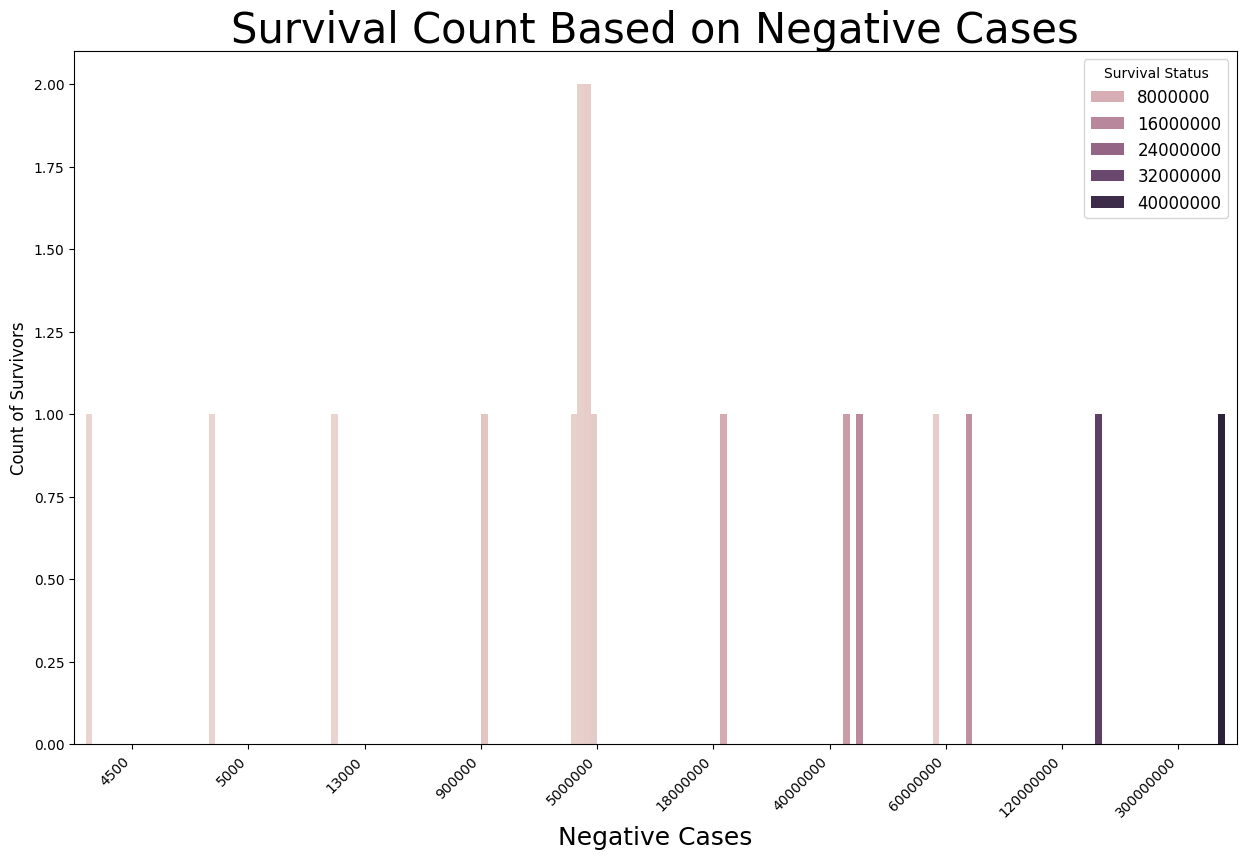

In [52]:
unique_negative_cases = Data1['Negative_Cases'].unique()
number_of_negative_cases_to_select = 10
randomly_selected_negative_cases = np.random.choice(unique_negative_cases, size=number_of_negative_cases_to_select, replace=False)
filtered_data = Data1[Data1['Negative_Cases'].isin(randomly_selected_negative_cases)]
plt.figure(figsize=(15, 9))
sns.countplot(x="Negative_Cases", hue="Survive", data=filtered_data)
plt.title("Survival Count Based on Negative Cases", fontsize=30)
plt.xlabel("Negative Cases", fontsize=18)
plt.ylabel("Count of Survivors", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(title='Survival Status', fontsize=12)
plt.show()

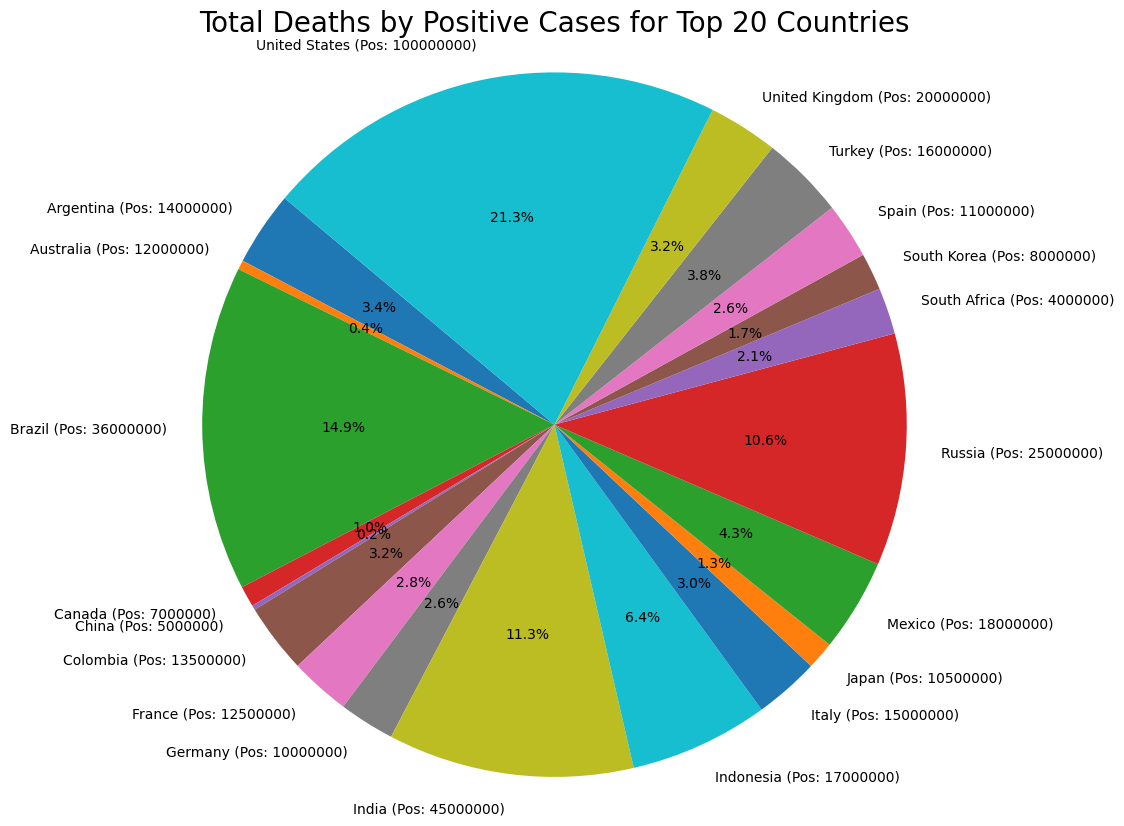

Data Summary:
         Countries Positive_Cases  Negative_Cases    Death   Survive
0    United States      100000000       500000000  1000000  90000000
1            India       45000000       300000000   530000  43000000
2           Brazil       36000000       120000000   700000  34000000
3          Germany       10000000        50000000   120000   9500000
4        Australia       12000000        40000000    20000  11900000
..             ...            ...             ...      ...       ...
99         Nirvana            550            9800      530        14
100        Elysium            300            5500      290         6
101       Valhalla           1200           15500     1150        35
102     Shangri-La            800           10800      780        19
103         Avalon            400            7200      390         9

[104 rows x 5 columns]


In [57]:
pd.options.mode.chained_assignment = None 
Data1['Positive_Cases'] = Data1['Positive_Cases'].astype(str)  
Data1['Death'] = pd.to_numeric(Data1['Death'], errors='coerce')  
Data1['Survive'] = pd.to_numeric(Data1['Survive'], errors='coerce')  
Data1 = Data1.dropna(subset=['Countries', 'Positive_Cases', 'Death', 'Survive'])
top_countries = Data1['Countries'].unique()[:20]
filtered_data = Data1[Data1['Countries'].isin(top_countries)]
death_counts = filtered_data.groupby(['Countries', 'Positive_Cases'])['Death'].sum().reset_index()
plt.figure(figsize=(10, 10))  
plt.pie(death_counts['Death'], 
        labels=death_counts.apply(lambda x: f"{x['Countries']} (Pos: {x['Positive_Cases']})", axis=1), 
        autopct='%1.1f%%', startangle=140)
plt.title("Total Deaths by Positive Cases for Top 20 Countries", fontsize=20)
plt.axis('equal') 
plt.show()
print("Data Summary:")
print(Data1[['Countries', 'Positive_Cases', 'Negative_Cases', 'Death', 'Survive']])

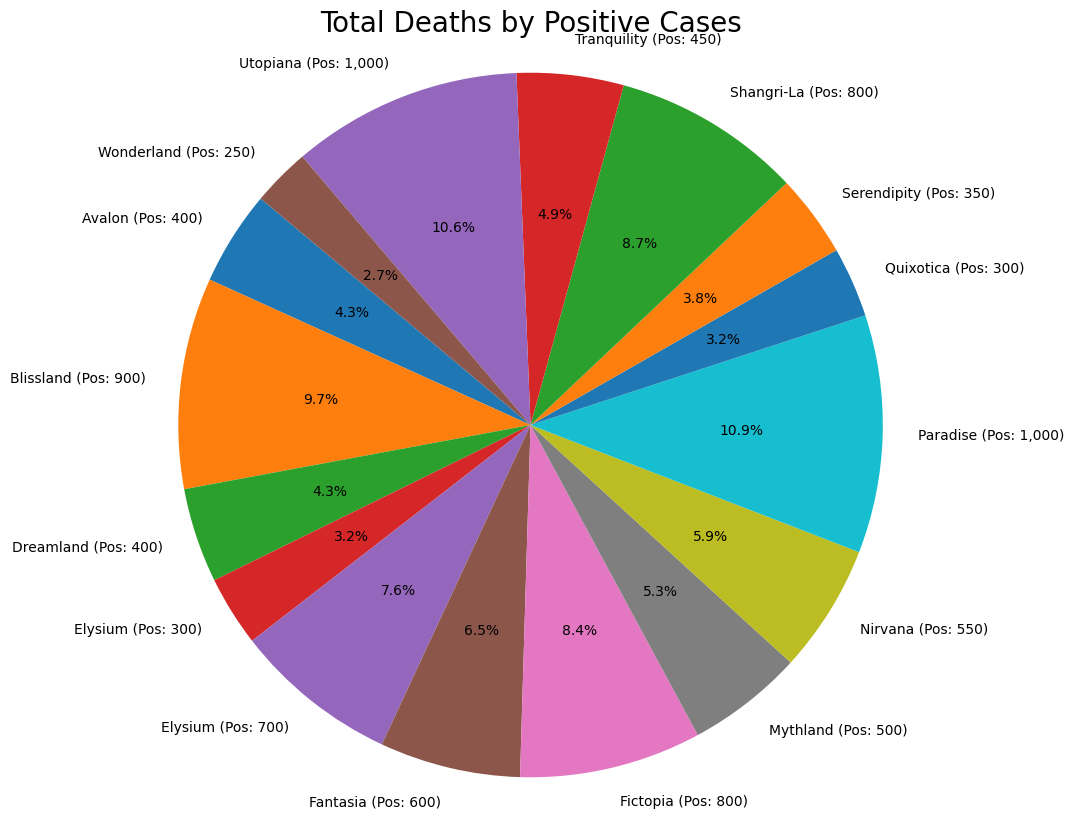

Data Summary:
       Countries Positive_Cases Negative_Cases  Death  Survive
84      Fictopia            800         10,500  750.0     20.0
85      Mythland            500           8000  480.0     10.0
86     Quixotica            300          5,000  290.0      5.0
87      Utopiana          1,000         12,000  950.0     25.0
89      Fantasia            600          9,000  580.0     15.0
90     Dreamland            400          7,500  390.0      8.0
91    Wonderland            250          4,500  240.0      3.0
92     Blissland            900         11,000  870.0     22.0
94       Elysium            700         10,200  680.0     18.0
95   Serendipity            350          6,000  340.0      7.0
97   Tranquility            450          8,500  440.0     12.0
98      Paradise          1,000         13,000  980.0     20.0
99       Nirvana            550          9,800  530.0     14.0
100      Elysium            300          5,500  290.0      6.0
102   Shangri-La            800         1

In [75]:
pd.options.mode.chained_assignment = None 
Data1['Positive_Cases'] = Data1['Positive_Cases'].astype(str)  
Data1['Death'] = pd.to_numeric(Data1['Death'], errors='coerce')  
Data1['Survive'] = pd.to_numeric(Data1['Survive'], errors='coerce')  
Data1 = Data1.dropna(subset=['Positive_Cases', 'Death', 'Survive'])
death_counts = Data1.groupby(['Countries', 'Positive_Cases'])['Death'].sum().reset_index()
plt.figure(figsize=(10, 10))  
plt.pie(death_counts['Death'], labels=death_counts.apply(lambda x: f"{x['Countries']} (Pos: {x['Positive_Cases']})", axis=1), autopct='%1.1f%%', startangle=140)
plt.title("Total Deaths by Positive Cases", fontsize=20)
plt.axis('equal') 
plt.show()
print("Data Summary:")
print(Data1[['Countries', 'Positive_Cases', 'Negative_Cases', 'Death', 'Survive']])

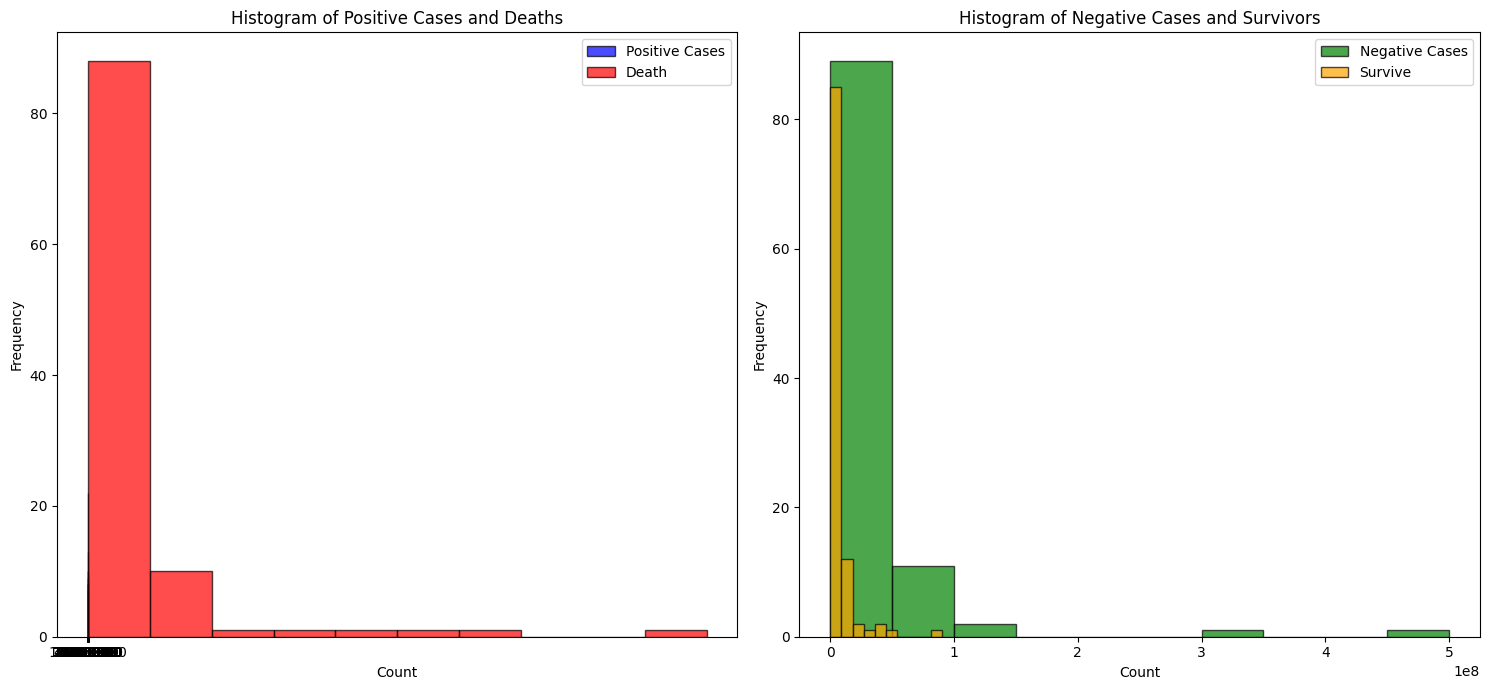

In [58]:
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.hist(Data1['Positive_Cases'], bins=10, alpha=0.7, label='Positive Cases', color='blue', edgecolor='black')
plt.hist(Data1['Death'], bins=10, alpha=0.7, label='Death', color='red', edgecolor='black')
plt.title("Histogram of Positive Cases and Deaths")
plt.xlabel("Count")
plt.ylabel("Frequency")
plt.legend()
plt.subplot(1, 2, 2)
plt.hist(Data1['Negative_Cases'], bins=10, alpha=0.7, label='Negative Cases', color='green', edgecolor='black')
plt.hist(Data1['Survive'], bins=10, alpha=0.7, label='Survive', color='orange', edgecolor='black')
plt.title("Histogram of Negative Cases and Survivors")
plt.xlabel("Count")
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()
plt.show()

#STATISTICAL AlGORITHM

In [3]:
Data1.isnull().sum()

Countries           0
Positive_Cases      0
Negative_Cases      0
Survive             0
Death               0
Vaccination_Date    0
dtype: int64

In [4]:
Data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Countries         104 non-null    object
 1   Positive_Cases    104 non-null    object
 2   Negative_Cases    104 non-null    object
 3   Survive           104 non-null    object
 4   Death             104 non-null    object
 5   Vaccination_Date  104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [5]:
print(Data1['Positive_Cases'].mode())

0    10,00,000
Name: Positive_Cases, dtype: object


In [6]:
print(Data1['Negative_Cases'].mode())

0    1,00,00,000
Name: Negative_Cases, dtype: object


In [7]:
print(Data1['Survive'].mode())

0    11,00,000
Name: Survive, dtype: object


In [9]:
print(Data1['Death'].mode())

0    10,000
1    20,000
Name: Death, dtype: object


In [37]:
if not Data1.empty:
    Data1['Positive_Cases'] = Data1['Positive_Cases'].astype(str).str.replace(',', '', regex=False)
    Data1['Positive_Cases'] = pd.to_numeric(Data1['Positive_Cases'], errors='coerce')
    median_positive_cases = Data1['Positive_Cases'].median()
    print("Median of Positive Cases:", median_positive_cases)
else:
    print("The DataFrame is empty.")

Median of Positive Cases: 1200000.0


In [38]:
if not Data1.empty:
    Data1['Negative_Cases'] = Data1['Negative_Cases'].astype(str).str.replace(',', '', regex=False)
    Data1['Negative_Cases'] = pd.to_numeric(Data1['Negative_Cases'], errors='coerce')
    median_negative_cases = Data1['Negative_Cases'].median()
    print("Median of Negative Cases:", median_negative_cases)
else:
    print("The DataFrame is empty.")

Median of Negative Cases: 5000000.0


In [39]:
if not Data1.empty:
    Data1['Survive'] = Data1['Survive'].astype(str).str.replace(',', '', regex=False)
    Data1['Survive'] = pd.to_numeric(Data1['Survive'], errors='coerce')
    median_survive_cases = Data1['Survive'].median()
    print("Median of Survive Cases:", median_survive_cases)
else:
    print("The DataFrame is empty.")

Median of Survive Cases: 1100000.0


In [40]:
if not Data1.empty:
    Data1['Death'] = Data1['Death'].astype(str).str.replace(',', '', regex=False)
    Data1['Death'] = pd.to_numeric(Data1['Death'], errors='coerce')
    median_death_cases = Data1['Death'].median()
    print("Median of Death Cases:", median_death_cases)
else:
    print("The DataFrame is empty.")

Median of Death Cases: 19750.0


In [42]:
if not Data1.empty:
    Data1['Vaccination_Date'] = pd.to_datetime(Data1['Vaccination_Date'], errors='coerce')
    Data1 = Data1.dropna(subset=['Vaccination_Date'])
    median_vaccination_date = Data1['Vaccination_Date'].median()
    print("Median of Vaccination Dates:", median_vaccination_date)
else:
    print("The DataFrame is empty.")

Median of Vaccination Dates: 2021-03-10 00:00:00


In [36]:
Data1['Positive_Cases'] = Data1['Positive_Cases'].astype(str).str.replace(',', '', regex=False)
Data1['Positive_Cases'] = pd.to_numeric(Data1['Positive_Cases'], errors='coerce')
nan_count_positive = Data1['Positive_Cases'].isnull().sum()
print("Total NaN values in Positive Cases:", nan_count_positive)
mean_positive_cases = Data1['Positive_Cases'].mean()
if pd.isna(mean_positive_cases):
    mean_positive_cases = 0
print("Average of Positive Cases (excluding NaN):", mean_positive_cases)

Total NaN values in Positive Cases: 0
Average of Positive Cases (excluding NaN): 5240534.615384615


In [35]:
Data1['Negative_Cases'] = Data1['Negative_Cases'].astype(str)
Data1['Negative_Cases'] = Data1['Negative_Cases'].str.replace(',', '', regex=False)
Data1['Negative_Cases'] = pd.to_numeric(Data1['Negative_Cases'], errors='coerce')
nan_count_negative = Data1['Negative_Cases'].isnull().sum()
print("Total NaN values in Negative Cases:", nan_count_negative)
mean_negative_cases = Data1['Negative_Cases'].mean()
if pd.isna(mean_negative_cases):
    mean_negative_cases = 0
print("Average of Negative Cases (excluding NaN):", mean_negative_cases)

Total NaN values in Negative Cases: 0
Average of Negative Cases (excluding NaN): 23727201.923076924


In [89]:
print(Data1['Negative_Cases'].mean()) 

8000.0


In [90]:
print(Data1['Survive'].mean()) 

14.571428571428571


In [91]:
print(Data1['Death'].mean()) 

601.4285714285714


In [92]:
print(Data1['Vaccination_Date'].mean()) 

2021-07-06 06:51:25.714285824


In [93]:
Data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, 84 to 99
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Countries         7 non-null      object        
 1   Positive_Cases    7 non-null      int64         
 2   Negative_Cases    1 non-null      float64       
 3   Survive           7 non-null      float64       
 4   Death             7 non-null      float64       
 5   Vaccination_Date  7 non-null      datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 392.0+ bytes


In [94]:
Data1.describe()

,Positive_Cases,Negative_Cases,Survive,Death,Vaccination_Date
count,7.000000,1.0,7.000000,7.000000,7
mean,628.571429,8000.0,14.571429,601.428571,2021-07-06 06:51:25.714285824
min,250.000000,8000.0,3.000000,240.000000,2021-01-05 00:00:00
25%,450.000000,8000.0,9.000000,435.000000,2021-03-06 12:00:00
50%,550.000000,8000.0,14.000000,530.000000,2021-05-07 00:00:00
75%,850.000000,8000.0,21.000000,810.000000,2021-10-06 00:00:00
max,1000.000000,8000.0,25.000000,950.000000,2022-05-05 00:00:00
std,276.672404,NaN,8.079958,261.688655,NaN


In [95]:
Data1['Positive_Cases'].value_counts()

Positive_Cases
800     1
500     1
1000    1
400     1
250     1
900     1
550     1
Name: count, dtype: int64

In [96]:
Data1['Negative_Cases'].value_counts()

Negative_Cases
8000.0    1
Name: count, dtype: int64

In [71]:
Data1['Survive'].value_counts()

Survive
11,00,000      5
9,00,000       4
4,50,000       4
18,00,000      3
14,00,000      3
              ..
30,00,000      1
37,00,000      1
4,30,00,000    1
19,00,000      1
9              1
Name: count, Length: 77, dtype: int64

In [97]:
Data1['Death'].value_counts()

Death
750.0    1
480.0    1
950.0    1
390.0    1
240.0    1
870.0    1
530.0    1
Name: count, dtype: int64

In [98]:
Data1['Vaccination_Date'].value_counts()

Vaccination_Date
2021-10-02    1
2021-05-03    1
2021-01-05    1
2021-01-08    1
2021-05-07    1
2021-10-10    1
2022-05-05    1
Name: count, dtype: int64

In [99]:
Data1['Countries'].value_counts()

Countries
Fictopia      1
Mythland      1
Utopiana      1
Dreamland     1
Wonderland    1
Blissland     1
Nirvana       1
Name: count, dtype: int64

In [33]:
Data1['Positive_Cases'] = Data1['Positive_Cases'].astype(str)
Data1['Positive_Cases'] = Data1['Positive_Cases'].str.replace(',', '', regex=False)
Data1['Positive_Cases'] = pd.to_numeric(Data1['Positive_Cases'], errors='coerce')
nan_count = Data1['Positive_Cases'].isnull().sum()
print("Total NaN values in Positive Cases:", nan_count)
variance_of_positive_cases = Data1['Positive_Cases'].var()
if pd.isna(variance_of_positive_cases):
    variance_of_positive_cases = 0
print("Calculated Variance of Positive Cases:", variance_of_positive_cases)

Total NaN values in Positive Cases: 0
Calculated Variance of Positive Cases: 139989421781411.52


In [6]:
import pandas as pd
from sklearn.linear_model import LinearRegression
for column in ["Positive_Cases", "Negative_Cases", "Survive", "Death"]:
    Data1[column] = Data1[column].astype(str).str.replace(',', '', regex=False).astype(int)
total_deaths = Data1["Death"].sum()  
total_survivors = Data1["Survive"].sum()  
X_positive = Data1[["Positive_Cases"]]
X_negative = Data1[["Negative_Cases"]]
y_deaths = Data1["Death"]
y_survived = Data1["Survive"]
y_negatives = Data1["Negative_Cases"]
death_model = LinearRegression()
survive_model = LinearRegression()
negative_model = LinearRegression()
death_model.fit(X_positive, y_deaths)
survive_model.fit(X_positive, y_survived)
negative_model.fit(X_negative, y_negatives)
def predict_covid_outcomes():
    case_type = input("Type 'P' for Positive Cases or 'N' for Negative Cases: ").strip().upper() 
    if case_type == "P":
        pos_cases_input = input("Enter the number of Positive Cases you want : ").replace(',', '')
        try:
            pos_cases = int(pos_cases_input)
        except ValueError:
            print("Invalid number format! Please enter a valid integer.")
            return    
        est_deaths = death_model.predict([[pos_cases]])[0]
        est_survive = survive_model.predict([[pos_cases]])[0]
        est_negatives = negative_model.predict([[pos_cases]])[0]        
    elif case_type == "N":
        neg_cases_input = input("Enter the number of Negative Cases you want to add : ").replace(',', '')
        try:
            neg_cases = int(neg_cases_input)
        except ValueError:
            print("Invalid number format! Please enter a valid integer.")
            return  
        pos_cases = negative_model.predict([[neg_cases]])[0] 
        est_deaths = death_model.predict([[pos_cases]])[0]
        est_survive = survive_model.predict([[pos_cases]])[0]
        est_negatives = neg_cases  
    else:
        print("Invalid input! Please enter 'P' or 'N'.")
        return
    total_predicted_deaths = int(est_deaths) + total_deaths 
    total_predicted_survive = int(est_survive) + total_survivors
    print(f"\nPredicted Outcomes for {int(neg_cases):,} Negative Cases:")
    print(f"- Estimated New Deaths: {int(est_deaths):,}")
    print(f"- Total Estimated Deaths (including previous cases): {total_predicted_deaths:,}")
    print(f"- Estimated New Survived Cases: {int(est_survive):,}")
    print(f"- Total Estimated Survived Cases (including previous cases): {total_predicted_survive:,}")
    print(f"- Estimated Negative Cases: {int(est_negatives):,}")
predict_covid_outcomes()

Type 'P' for Positive Cases or 'N' for Negative Cases:  N
Enter the number of Negative Cases you want to add :  15,00,00,000



Predicted Outcomes for 150,000,000 Negative Cases:
- Estimated New Deaths: 1,678,068
- Total Estimated Deaths (including previous cases): 8,505,448
- Estimated New Survived Cases: 137,856,267
- Total Estimated Survived Cases (including previous cases): 725,651,713
- Estimated Negative Cases: 150,000,000


C:\Users\LAB\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\LAB\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\LAB\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [3]:
import pandas as pd
from sklearn.linear_model import LinearRegression
for column in ["Positive_Cases", "Negative_Cases", "Survive", "Death"]:
    Data1[column] = Data1[column].astype(str).str.replace(',', '', regex=False).astype(int)
total_deaths = Data1["Death"].sum()  
total_survivors = Data1["Survive"].sum()  
X_positive = Data1[["Positive_Cases"]]
X_negative = Data1[["Negative_Cases"]]
y_deaths = Data1["Death"]
y_survived = Data1["Survive"]
y_negatives = Data1["Negative_Cases"]
death_model = LinearRegression()
survive_model = LinearRegression()
negative_model = LinearRegression()
death_model.fit(X_positive, y_deaths)
survive_model.fit(X_positive, y_survived)
negative_model.fit(X_negative, y_negatives)
def predict_covid_outcomes():
    case_type = input("Type 'P' for Positive Cases or 'N' for Negative Cases: ").strip().upper() 
    if case_type == "P":
        pos_cases_input = input("Enter the number of Positive Cases you want : ").replace(',', '')
        try:
            pos_cases = int(pos_cases_input)
        except ValueError:
            print("Invalid number format! Please enter a valid integer.")
            return    
        est_deaths = death_model.predict([[pos_cases]])[0]
        est_survive = survive_model.predict([[pos_cases]])[0]
        est_negatives = negative_model.predict([[pos_cases]])[0]        
    elif case_type == "N":
        neg_cases_input = input("Enter the number of Negative Cases you want : ").replace(',', '')
        try:
            neg_cases = int(neg_cases_input)
        except ValueError:
            print("Invalid number format! Please enter a valid integer.")
            return  
        pos_cases = negative_model.predict([[neg_cases]])[0] 
        est_deaths = death_model.predict([[pos_cases]])[0]
        est_survive = survive_model.predict([[pos_cases]])[0]
        est_negatives = neg_cases  
    else:
        print("Invalid input! Please enter 'P' or 'N'.")
        return
    total_predicted_deaths = int(est_deaths) + total_deaths 
    total_predicted_survive = int(est_survive) + total_survivors
    print(f"\nPredicted Outcomes for {int(pos_cases):,} Positive Cases:")
    print(f"- Estimated New Deaths: {int(est_deaths):,}")
    print(f"- Total Estimated Deaths (including previous cases): {total_predicted_deaths:,}")
    print(f"- Estimated New Survived Cases: {int(est_survive):,}")
    print(f"- Total Estimated Survived Cases (including previous cases): {total_predicted_survive:,}")
    print(f"- Estimated Negative Cases: {int(est_negatives):,}")
predict_covid_outcomes()

Type 'P' for Positive Cases or 'N' for Negative Cases:  P
Enter the number of Positive Cases:  20,00,00,000



Predicted Outcomes for 200,000,000 Positive Cases:
- Estimated New Deaths: 2,234,999
- Total Estimated Deaths (including previous cases): 9,062,379
- Estimated New Survived Cases: 183,519,737
- Total Estimated Survived Cases (including previous cases): 771,315,183
- Estimated Negative Cases: 199,999,999


C:\Users\LAB\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\LAB\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\LAB\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [21]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from flask import Flask, render_template_string, request, jsonify
import matplotlib.pyplot as plt
import io
import base64

# Load the Data1 DataFrame from a CSV or any other source
# Example: Data1 = pd.read_csv('data.csv')

# Clean up the input data by removing commas
for column in ["Positive_Cases", "Negative_Cases", "Survive", "Death"]:
    Data1[column] = Data1[column].replace({',': ''}, regex=True).astype(int)

# Summing up total deaths and survivors
total_deaths = Data1["Death"].sum()
total_survivors = Data1["Survive"].sum()

# Defining features and target variables
X_positive = Data1[["Positive_Cases"]]
X_negative = Data1[["Negative_Cases"]]
y_deaths = Data1["Death"]
y_survived = Data1["Survive"]
y_negatives = Data1["Negative_Cases"]

# Creating models for prediction
death_model = LinearRegression()
survive_model = LinearRegression()
negative_model = LinearRegression()

# Fitting models
death_model.fit(X_positive, y_deaths)
survive_model.fit(X_positive, y_survived)
negative_model.fit(X_negative, y_negatives)

# Flask app setup
app = Flask(__name__)

@app.route('/')
def index():
    return render_template_string('''
    <!DOCTYPE html>
    <html lang="en">
    <head>
        <meta charset="UTF-8">
        <meta name="viewport" content="width=device-width, initial-scale=1.0">
        <title>COVID-19 Outcome Predictor</title>
        <link rel="stylesheet" href="https://stackpath.bootstrapcdn.com/bootstrap/4.5.2/css/bootstrap.min.css">
        <script src="https://code.jquery.com/jquery-3.5.1.min.js"></script>
    </head>
    <body>
        <div class="container mt-5">
            <h1>COVID-19 Outcome Predictor</h1>
            <form id="prediction-form">
                <div class="form-group">
                    <label for="case_type">Select Case Type:</label>
                    <select class="form-control" id="case_type" name="case_type" required>
                        <option value="P">Positive Cases</option>
                        <option value="N">Negative Cases</option>
                    </select>
                </div>
                <div class="form-group">
                    <label for="cases">Enter the number of Cases:</label>
                    <input type="text" class="form-control" id="cases" name="cases" required>
                </div>
                <button type="submit" class="btn btn-primary">Predict</button>
            </form>

            <div id="results" class="mt-4" style="display: none;">
                <h3>Predicted Outcomes:</h3>
                <p id="output"></p>
                <img id="plot" src="" alt="Predicted Outcomes Plot" style="width: 100%; max-width: 600px;"/>
            </div>
        </div>

        <script>
            $(document).ready(function() {
                $('#prediction-form').on('submit', function(event) {
                    event.preventDefault();
                    const formData = $(this).serialize();

                    $.post('/predict', formData, function(data) {
                        if (data.error) {
                            alert(data.error);
                        } else {
                            $('#output').html(
                                '- Estimated New Deaths: ' + data.est_deaths + '<br>' +
                                '- Total Estimated Deaths: ' + data.total_predicted_deaths + '<br>' +
                                '- Estimated New Survivors: ' + data.est_survive + '<br>' +
                                '- Total Estimated Survivors: ' + data.total_predicted_survive
                            );
                            $('#plot').attr('src', 'data:image/png;base64,' + data.plot_url);
                            $('#results').show();
                        }
                    });
                });
            });
        </script>
    </body>
    </html>
    ''')

@app.route('/predict', methods=['POST'])
def predict():
    case_type = request.form['case_type']
    cases_input = request.form['cases'].replace(',', '')  # Remove commas in the input
    try:
        cases = int(cases_input)
    except ValueError:
        return jsonify({"error": "Invalid number format! Please enter a valid integer."})

    if case_type == "P":
        est_deaths = death_model.predict([[cases]])[0]
        est_survive = survive_model.predict([[cases]])[0]
        est_negatives = negative_model.predict([[cases]])[0]
    elif case_type == "N":
        est_negatives = cases
        pos_cases = negative_model.predict([[est_negatives]])[0]
        est_deaths = death_model.predict([[pos_cases]])[0]
        est_survive = survive_model.predict([[pos_cases]])[0]
    else:
        return jsonify({"error": "Invalid input! Please enter 'P' or 'N'."})

    total_predicted_deaths = int(est_deaths) + total_deaths
    total_predicted_survive = int(est_survive) + total_survivors

    # Create a plot
    plt.figure(figsize=(8, 4))
    plt.bar(['Estimated New Deaths', 'Total Estimated Deaths', 'Estimated New Survivors', 'Total Estimated Survivors'],
            [int(est_deaths), total_predicted_deaths, int(est_survive), total_predicted_survive],
            color=['red', 'darkred', 'green', 'darkgreen'])
    plt.title('Predicted COVID-19 Outcomes')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    img = io.BytesIO()
    plt.savefig(img, format='png')
    img.seek(0)
    plot_url = base64.b64encode(img.getvalue()).decode()

    return jsonify({
        "est_deaths": int(est_deaths),
        "total_predicted_deaths": total_predicted_deaths,
        "est_survive": int(est_survive),
        "total_predicted_survive": total_predicted_survive,
        "plot_url": plot_url
    })

if __name__ == '__main__':
    # Set the host to '0.0.0.0' to allow the app to be accessible from external servers
    app.run(host='0.0.0.0', port=5000, debug=True)  # Change port as needed


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://192.168.1.226:5000
Press CTRL+C to quit
 * Restarting with stat


SystemExit: 1

C:\Users\LAB\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
